In [1]:
from pathlib import Path
from analysis import files, analysis
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

root_data_path = Path("/Users/spencer/motor-control/data")
metadata_path = root_data_path / "metadata" / "emg_olympics"

In [2]:
olympics_subjects = files.get_subjects("emg_olympics")
olympics_subjects.sort()
repeat_subjects = files.get_subjects("emg_repeats")
repeat_subjects.sort()

In [3]:
def calculate_hit_fractions_per_session(hits):
    num_targets = 12
    return [h * (100 / 12) for h in hits]
    
def calculate_total_fraction(hits):
    num_targets = 12
    return 100 * sum(hits) / (num_sessions * 12)

def log(x, a, b):
    return b * np.log(x) + a

In [4]:
hits_subjects = []
misses_subjects = []
noholds_subjects = []
fractions_subjects = []
reach_times_subjects = []
total_fractions = []
for subject in olympics_subjects:
    hits, misses, noholds, num_sessions, reach_times = analysis.get_outcomes("emg_olympics", subject)
    hits_subjects.append(hits) 
    misses_subjects.append(misses)
    noholds_subjects.append(noholds)
    reach_times_subjects.append(reach_times)
    fractions_subjects.append(calculate_hit_fractions_per_session(hits))
    total_fractions.append(calculate_total_fraction(hits))

/Users/spencer/motor-control/data-analysis/analysis/analysis.py:19: UserWarning: genfromtxt: Empty input file: "/Users/spencer/motor-control/data/rawdata/emg_olympics/andrei/center_hold/session_11/session_result_2021-09-29T17_30_57.csv"
  behavior = np.genfromtxt(


### counting numbers of hits

In [5]:
# limited to the first 45, no special skipped blocks, etc.
hit_sums = list(map(sum, [h[:45] for h in hits_subjects]))
zipped = zip(*sorted(zip(hit_sums, olympics_subjects)))
hits_and_subjects = list(zipped)

most_hit_subject = hits_and_subjects[1][-1]
most_hits = hits_and_subjects[0][-1]
median_hit_subject = hits_and_subjects[1][len(hits_and_subjects[1])//2]
median_hits = hits_and_subjects[0][len(hits_and_subjects[1])//2]
least_hit_subject = hits_and_subjects[1][0]
least_hits = hits_and_subjects[0][0]

print(most_hit_subject, most_hits)
print(median_hit_subject, median_hits)
print(least_hit_subject, least_hits)

morio 524
holly 412
hyewon 207


### plot hits, misses, no-holds over sessions

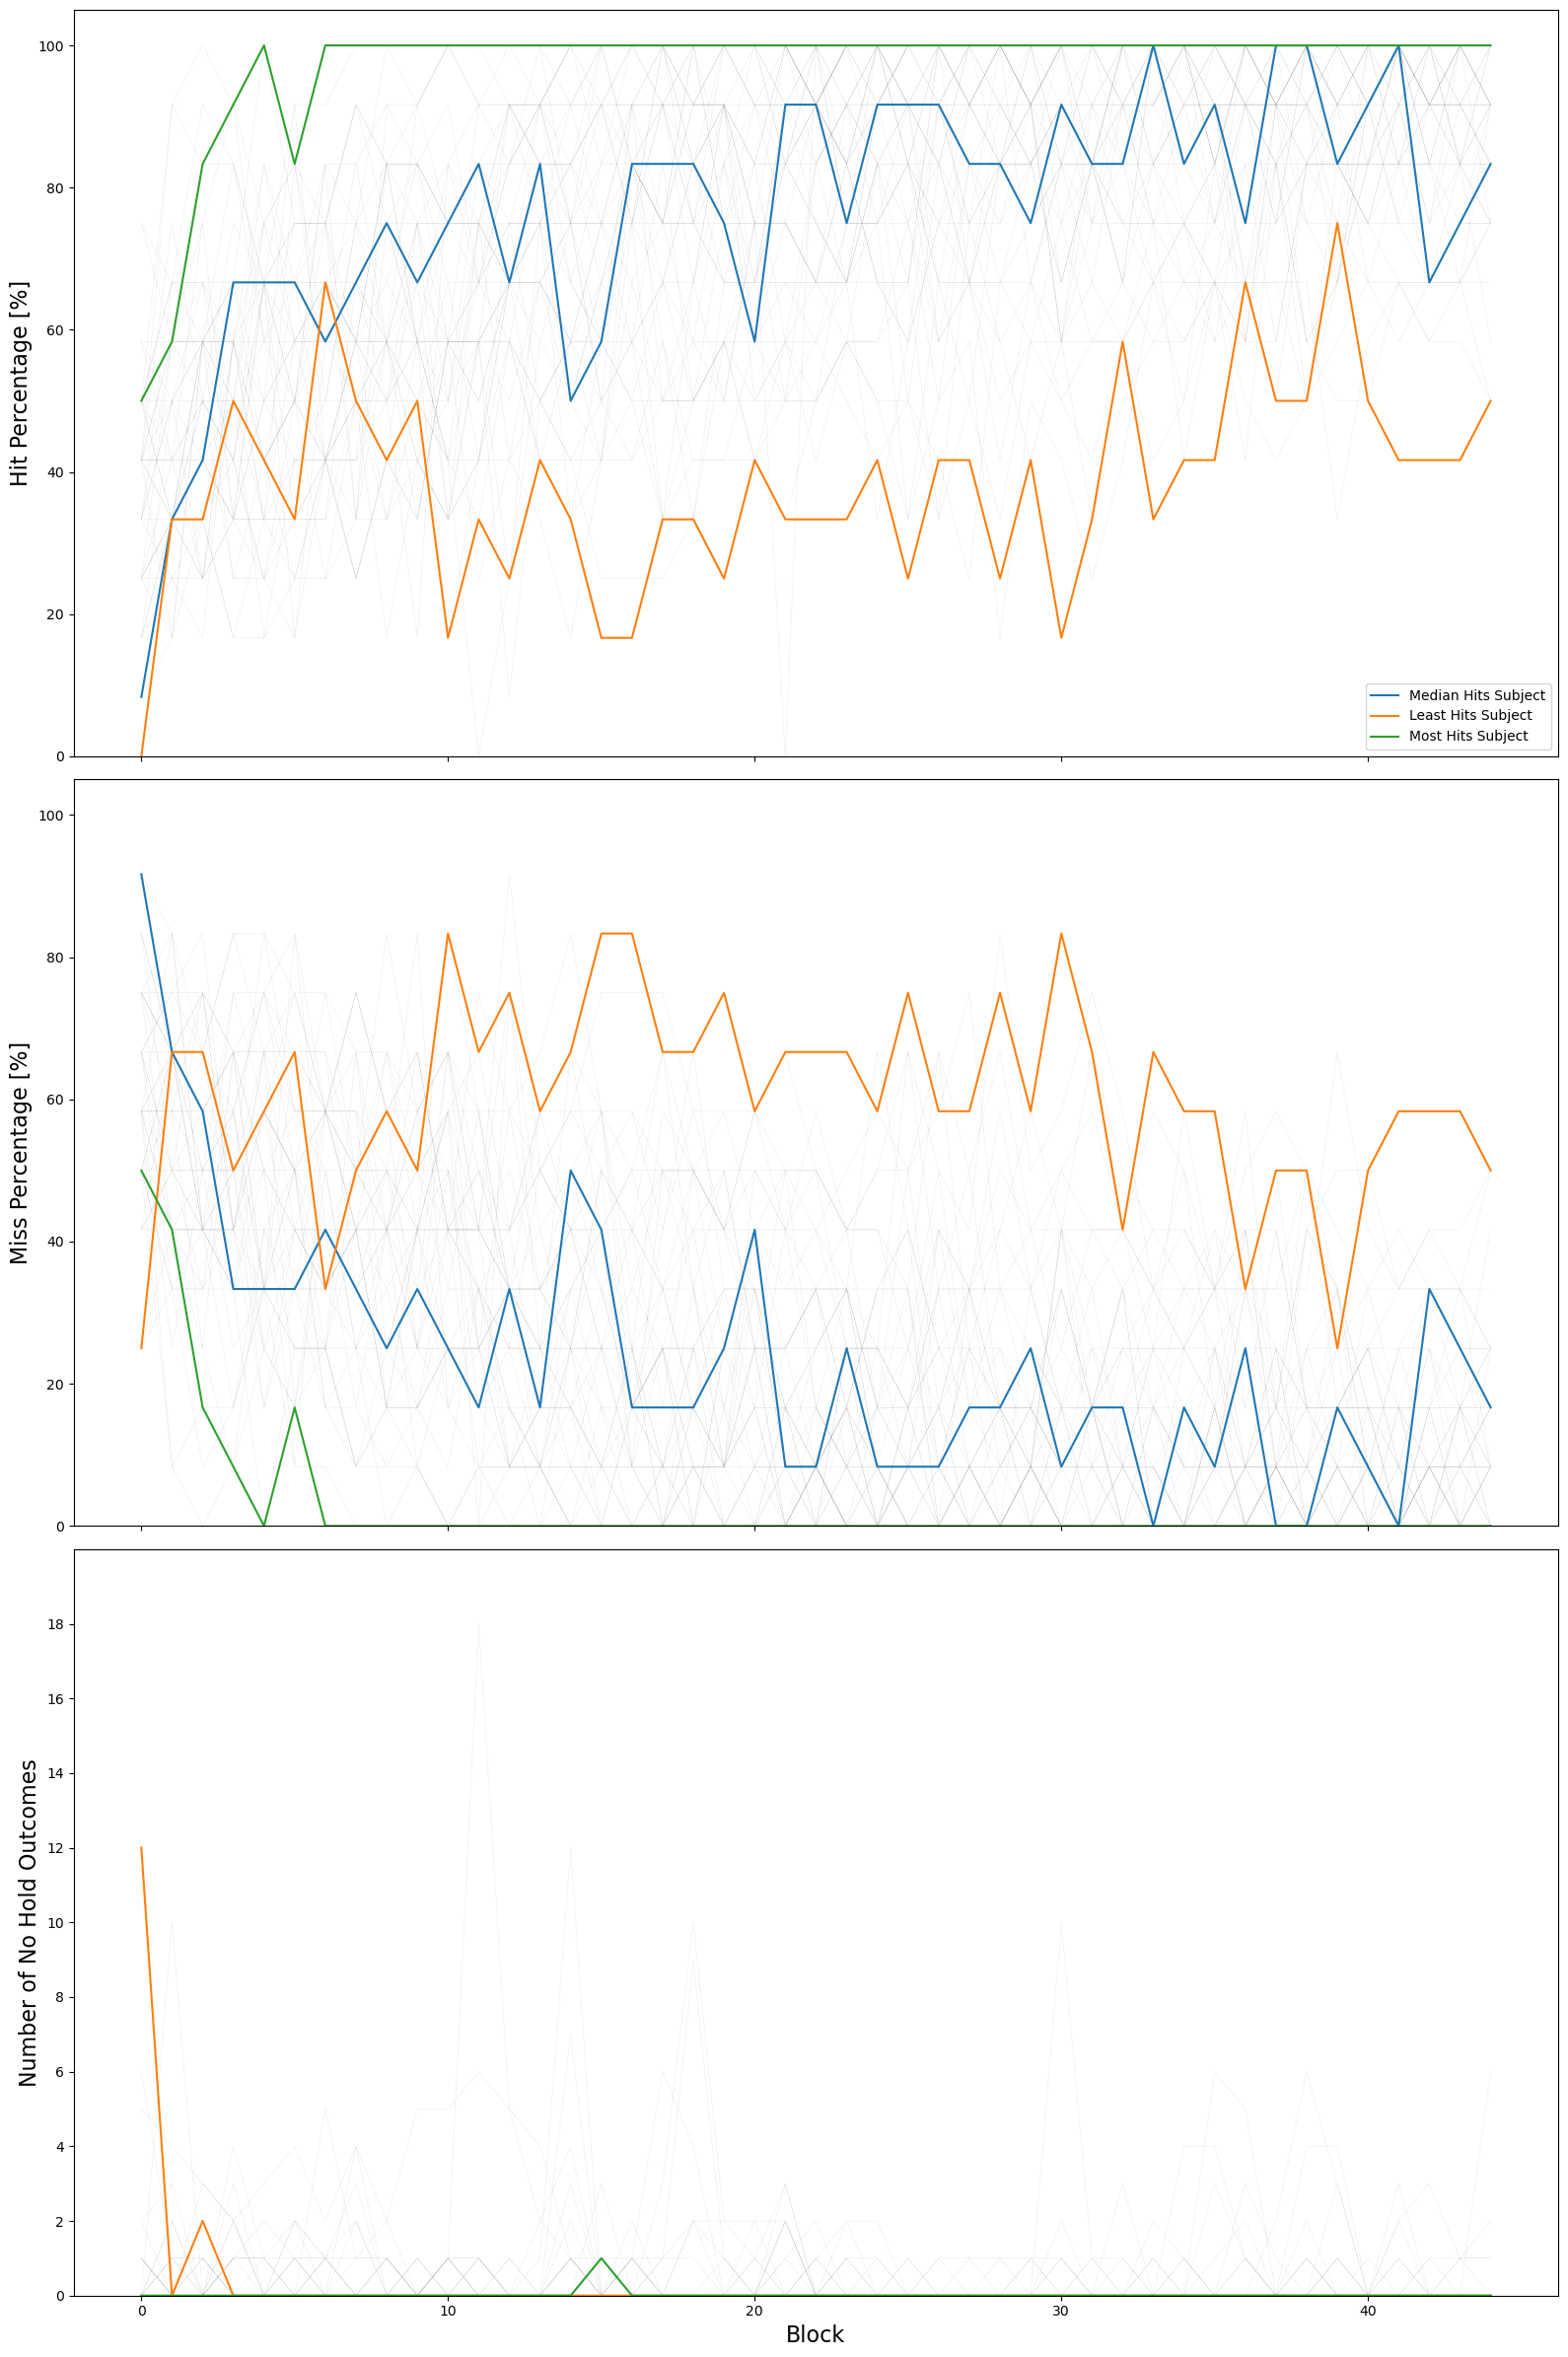

In [17]:
outcomes_fig, (hit_ax, miss_ax, nohold_ax) = plt.subplots(3,1,figsize=(16,24),sharex=True)

for sub, hs in zip(olympics_subjects, fractions_subjects):
    if sub == most_hit_subject:
        hit_ax.plot(hs[:45],label="Most Hits Subject",zorder=100)
    elif sub == median_hit_subject:
        hit_ax.plot(hs[:45],label="Median Hits Subject",zorder=100)
    elif sub == least_hit_subject:
        hit_ax.plot(hs[:45],label="Least Hits Subject",zorder=100)
    else:
        hit_ax.plot(hs[:45], "grey", linewidth=0.3,alpha=0.2)

for sub, ms in zip(olympics_subjects, misses_subjects):
    ms = [m/0.12 for m in ms]
    if sub == most_hit_subject:
        miss_ax.plot(ms[:45],zorder=100)
    elif sub == median_hit_subject:
        miss_ax.plot(ms[:45],zorder=100)
    elif sub == least_hit_subject:
        miss_ax.plot(ms[:45],zorder=100)
    else:
        miss_ax.plot(ms[:45], "grey", linewidth=0.3,alpha=0.2)
        
for sub, nhs in zip(olympics_subjects, noholds_subjects):
    if sub == most_hit_subject:
        nohold_ax.plot(nhs[:45],zorder=100)
    elif sub == median_hit_subject:
        nohold_ax.plot(nhs[:45],zorder=100)
    elif sub == least_hit_subject:
        nohold_ax.plot(nhs[:45],zorder=100)
    else:
        nohold_ax.plot(nhs[:45], "grey", linewidth=0.3,alpha=0.2)

# hit_ax.set_title("Hits over Blocks", fontsize=16)
hit_ax.set_ylim([0,105])
hit_ax.set_ylabel("Hit Percentage [%]", fontsize=16)
hit_ax.legend(loc="lower right")

# miss_ax.set_title("Misses over Blocks", fontsize=16)
miss_ax.set_ylim([0,105])
miss_ax.set_ylabel("Miss Percentage [%]", fontsize=16)

# nohold_ax.set_title("No Holds over Blocks", fontsize=16)
nohold_ax.set_ylabel("Number of No Hold Outcomes", fontsize=16)
nohold_ax.set_ylim([0,20])
nohold_ax.set_yticks(list(range(0,20,2)))
nohold_ax.set_xlabel("Block", fontsize=16)

outcomes_fig.tight_layout()

In [18]:
outcomes_fig.savefig("/Users/spencer/motor-control/thesis/images/data_analysis2023/outcomes.pdf", dpi=300, format="pdf")

### plot reach times

In [8]:
45*12

540

In [9]:
print(len(reach_times_subjects))
print(len(reach_times_subjects[2]))
print(len(reach_times_subjects[3]))

46
724
545


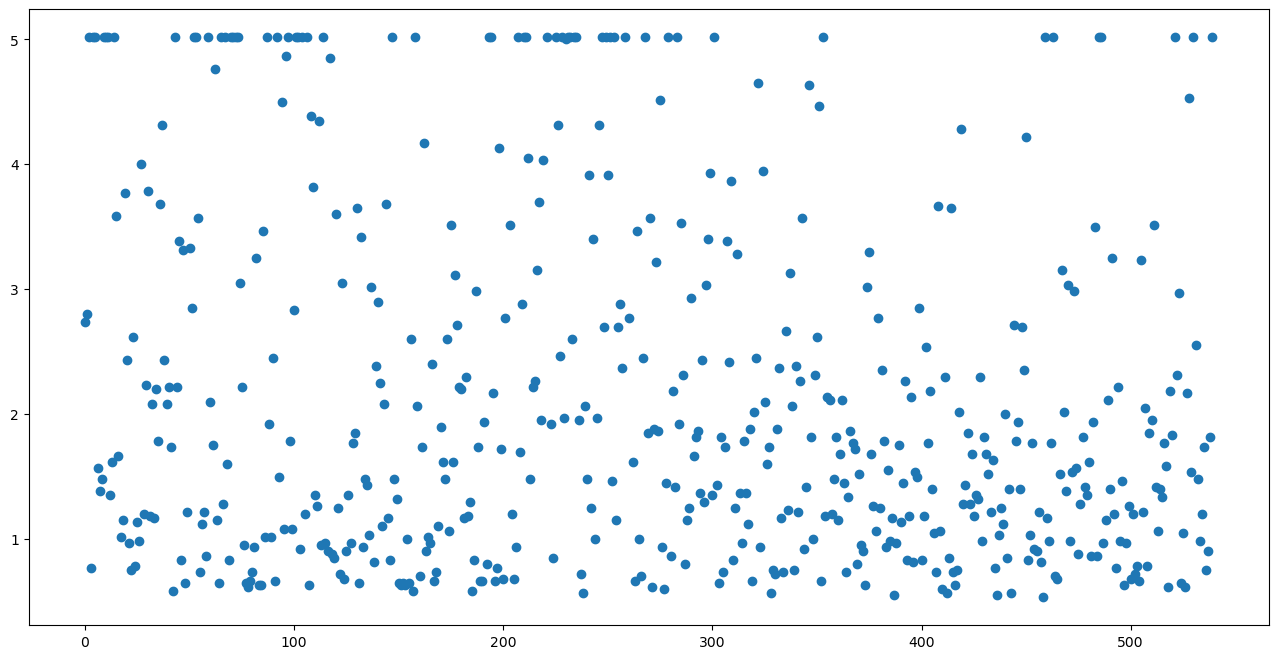

In [10]:
fig, ax = plt.subplots(1,1, figsize=[16,8])
for rts in reach_times_subjects[:1]:
    ax.plot(rts[:540],'o')